Problem 1

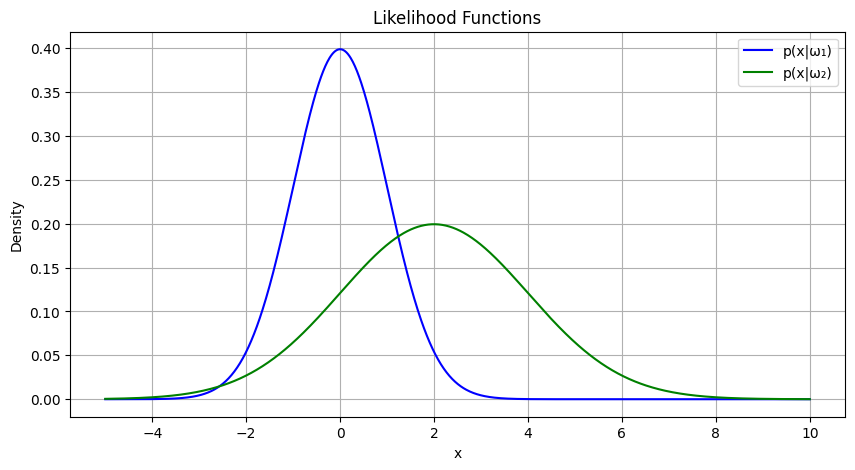

1) p(x=5|ω₁) = 0.0000
1) p(x=5|ω₂) = 0.0648
2) p(x=5) = 0.0259


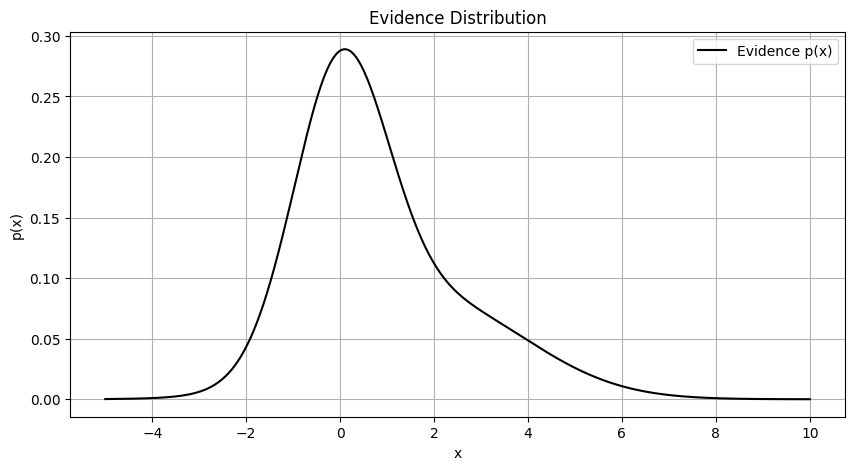

3) P(ω₁|x=5) = 0.0000
3) P(ω₂|x=5) = 1.0000


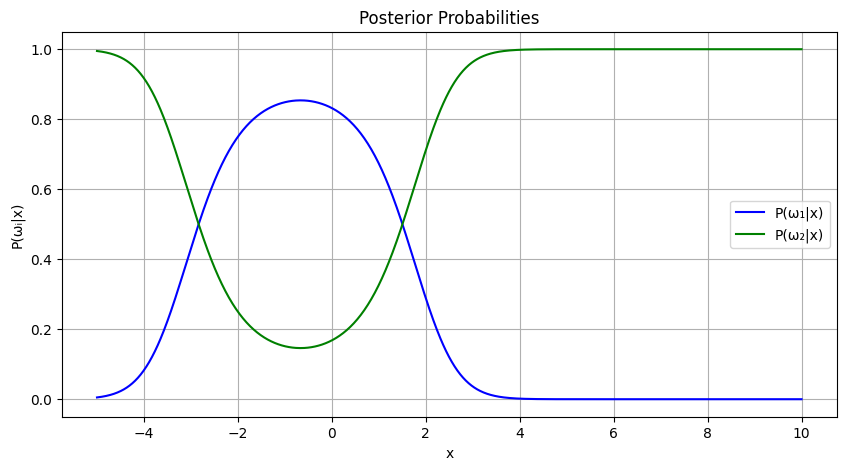

4) Likelihood Ratio at x=5 = 0.0000


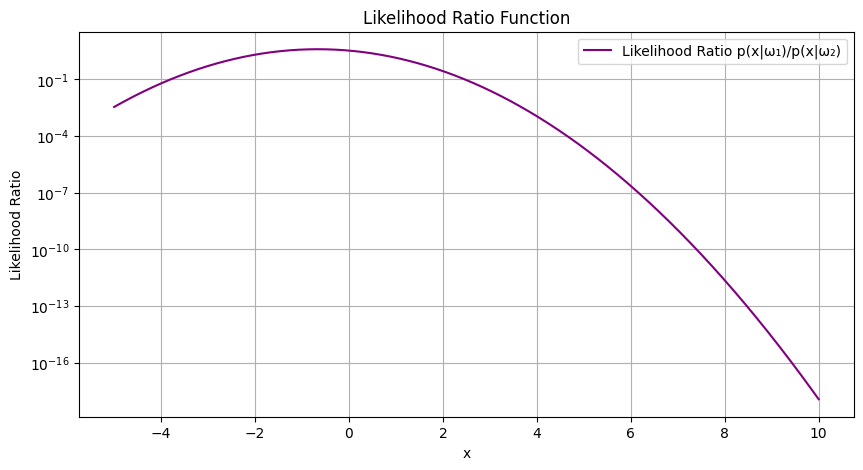

5) Threshold (zero-one loss) = 0.6667
6) Threshold (given loss matrix) = 0.7500
7) Bayes Risk R(a₁|x=5) = 3.9999
7) Bayes Risk R(a₂|x=5) = 0.0001


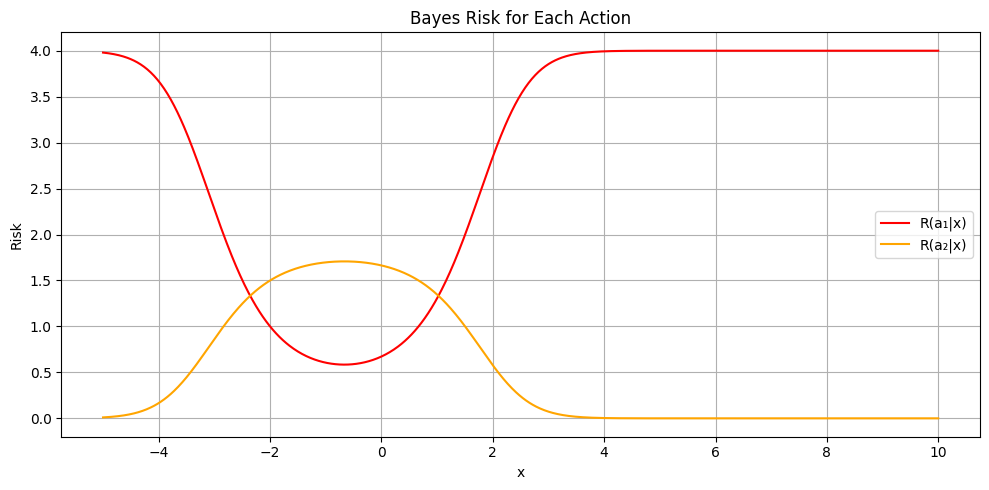

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Priors
P_w1 = 3/5
P_w2 = 2/5

# Likelihood parameters
mu1, sigma1 = 0, np.sqrt(1)
mu2, sigma2 = 2, np.sqrt(4)

# x range for sketching
x_vals = np.linspace(-5, 10, 1000)

# Likelihoods
p_x_given_w1 = norm.pdf(x_vals, mu1, sigma1)
p_x_given_w2 = norm.pdf(x_vals, mu2, sigma2)

# Step 1: Plot likelihoods
plt.figure(figsize=(10, 5))
plt.plot(x_vals, p_x_given_w1, label='p(x|ω₁)', color='blue')
plt.plot(x_vals, p_x_given_w2, label='p(x|ω₂)', color='green')
plt.title('Likelihood Functions')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Step 1 (cont.): Likelihoods at x=5
x = 5
likelihood_w1 = norm.pdf(x, mu1, sigma1)
likelihood_w2 = norm.pdf(x, mu2, sigma2)
print(f"1) p(x=5|ω₁) = {likelihood_w1:.4f}")
print(f"1) p(x=5|ω₂) = {likelihood_w2:.4f}")

# Step 2: Evidence
evidence = P_w1 * likelihood_w1 + P_w2 * likelihood_w2
print(f"2) p(x=5) = {evidence:.4f}")

# Evidence distribution
evidence_dist = P_w1 * p_x_given_w1 + P_w2 * p_x_given_w2
plt.figure(figsize=(10, 5))
plt.plot(x_vals, evidence_dist, label='Evidence p(x)', color='black')
plt.title("Evidence Distribution")
plt.xlabel('x'); plt.ylabel('p(x)')
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Posterior
posterior_w1 = (P_w1 * likelihood_w1) / evidence
posterior_w2 = (P_w2 * likelihood_w2) / evidence
print(f"3) P(ω₁|x=5) = {posterior_w1:.4f}")
print(f"3) P(ω₂|x=5) = {posterior_w2:.4f}")

# Posterior probabilities
posterior_w1_dist = (P_w1 * p_x_given_w1) / evidence_dist
posterior_w2_dist = (P_w2 * p_x_given_w2) / evidence_dist
plt.figure(figsize=(10, 5))
plt.plot(x_vals, posterior_w1_dist, label='P(ω₁|x)', color='blue')
plt.plot(x_vals, posterior_w2_dist, label='P(ω₂|x)', color='green')
plt.title("Posterior Probabilities")
plt.xlabel('x'); plt.ylabel('P(ωᵢ|x)')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Likelihood ratio
likelihood_ratio = likelihood_w1 / likelihood_w2
print(f"4) Likelihood Ratio at x=5 = {likelihood_ratio:.4f}")

# Likelihood ratio
likelihood_ratio_dist = p_x_given_w1 / p_x_given_w2
plt.figure(figsize=(10, 5))
plt.plot(x_vals, likelihood_ratio_dist, label='Likelihood Ratio p(x|ω₁)/p(x|ω₂)', color='purple')
plt.title("Likelihood Ratio Function")
plt.xlabel('x'); plt.ylabel('Likelihood Ratio')
plt.yscale("log")  # log scale to visualize sharp contrast
plt.grid(True)
plt.legend()
plt.show()
# Step 5: Zero-one loss threshold
threshold_01 = P_w2 / P_w1
print(f"5) Threshold (zero-one loss) = {threshold_01:.4f}")

# Step 6: Threshold for general loss matrix
L = np.array([[0, 4], [2, 0]])
threshold_risk = (L[1, 0] - L[0, 0]) * P_w1 / ((L[0, 1] - L[1, 1]) * P_w2)
print(f"6) Threshold (given loss matrix) = {threshold_risk:.4f}")

# Step 7: Bayes Risk R(α_i | x)
R_a1 = L[0, 0] * posterior_w1 + L[0, 1] * posterior_w2
R_a2 = L[1, 0] * posterior_w1 + L[1, 1] * posterior_w2
print(f"7) Bayes Risk R(a₁|x=5) = {R_a1:.4f}")
print(f"7) Bayes Risk R(a₂|x=5) = {R_a2:.4f}")

# Bayes risk
R_a1_dist = L[0, 0] * posterior_w1_dist + L[0, 1] * posterior_w2_dist
R_a2_dist = L[1, 0] * posterior_w1_dist + L[1, 1] * posterior_w2_dist
dx = x_vals[1] - x_vals[0]
pointwise_min_risk = np.minimum(R_a1_dist, R_a2_dist)
bayes_risk = np.sum(pointwise_min_risk * evidence_dist) * dx
print(f"Total Bayes Risk (scalar): {bayes_risk:.4f}")
plt.figure(figsize=(10, 5))
plt.plot(x_vals, R_a1_dist, label='R(a₁|x)', color='red')
plt.plot(x_vals, R_a2_dist, label='R(a₂|x)', color='orange')
plt.title("Bayes Risk for Each Action")
plt.xlabel('x'); plt.ylabel('Risk')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Problem 2

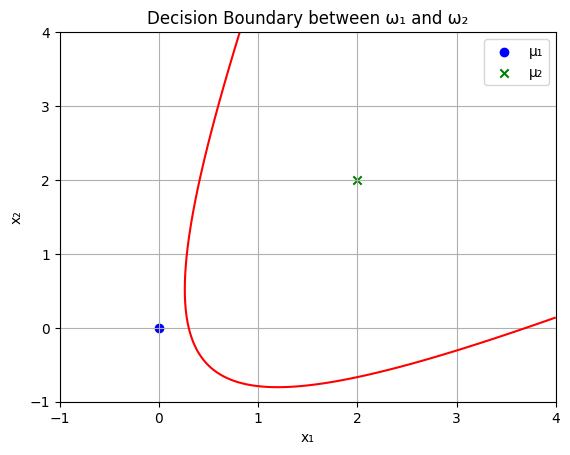

Bhattacharyya coefficient (BC): 0.6779
Bhattacharyya error bound: 0.2198


In [9]:
import numpy as np
from numpy.linalg import inv, det
from scipy.stats import multivariate_normal

# Given parameters
mu1 = np.array([0, 0])
mu2 = np.array([2, 2])

Sigma1 = np.array([[1, 0], [0, 2]])
Sigma2 = np.array([[1, 1], [1, 2]])

P1 = 0.25
P2 = 0.75

# Decision boundary: log-likelihood ratio = log(P1/P2)
def decision_boundary(x):
    x = np.array(x)
    inv_S1 = inv(Sigma1)
    inv_S2 = inv(Sigma2)
    term1 = -0.5 * (x - mu1).T @ inv_S1 @ (x - mu1)
    term2 = -0.5 * (x - mu2).T @ inv_S2 @ (x - mu2)
    log_det_ratio = 0.5 * np.log(det(Sigma2) / det(Sigma1))
    log_prior_ratio = np.log(P1 / P2)
    return term1 - term2 + log_det_ratio + log_prior_ratio

# Test a grid of x points to find boundary (plotting option)
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.linspace(-1, 4, 300), np.linspace(-1, 4, 300))
Z = np.array([decision_boundary([x, y]) for x, y in zip(X.ravel(), Y.ravel())])
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0], colors='red')
plt.title("Decision Boundary between ω₁ and ω₂")
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.grid(True)
plt.scatter(*mu1, marker='o', color='blue', label='μ₁')
plt.scatter(*mu2, marker='x', color='green', label='μ₂')
plt.legend()
plt.show()

# Bhattacharyya Bound
mu_diff = mu2 - mu1
Sigma_avg = (Sigma1 + Sigma2) / 2

term1 = (1/8) * mu_diff.T @ inv(Sigma_avg) @ mu_diff
term2 = 0.5 * np.log(det(Sigma_avg) / np.sqrt(det(Sigma1) * det(Sigma2)))
BC = term1 + term2
error_bound = np.sqrt(P1 * P2) * np.exp(-BC)

print(f"Bhattacharyya coefficient (BC): {BC:.4f}")
print(f"Bhattacharyya error bound: {error_bound:.4f}")